In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geeksw.hgcal.testbeam as hgc
import math

In [ ]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query('Configuration == "24a"')
#pion_runlist = hgc.runlist.query("Particle == 'pion'").query('Configuration == "24a"').groupby("Energy").apply(lambda x : x.iloc[[1,2,3,4,5,6]])
energy = pion_runlist.Energy.values

In [4]:
run_numbers = pion_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
print (X0_meanvalue)
print (energy)
df = pd.DataFrame({
    "energy" : energy,
    "X0_meanvalue" : X0_meanvalue,
    })
df.to_csv("Showermaximum_Beamenergy_plotting_pions_24a.csv")
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[31.881614917511122, 31.822675861292055, 31.88238589321589, 33.312534990402639, 33.249369739854941, 33.338162505709562, 33.465604372653409, 33.290465062374487, 31.007608826938085, 31.208337036718618, 31.049763757748533, 31.188257275025364, 30.990482721420008, 33.558331406210321, 33.551084995005041, 33.931363430737292, 33.759134230317663, 33.617158625902142, 32.90899652359402, 33.482270581302934, 33.471887344264893, 33.194222188179381, 33.513552796347298, 33.619253080903789, 33.312093318345724, 33.371293483139482, 33.254601383222266, 33.529928962758511, 33.402556504184844, 33.469377525253222, 33.387877299016111, 33.32618798654503, 32.708337057926691, 32.305467106750704, 32.526127326149258, 30.857707196014005, 31.139363937389106, 34.097751109912991, 34.315324974662623, 34.291431856599637, 33.012182565905391, 32.947718678136596, 32.952533515719232, 32.790910920973872, 33.064622504269934, 33.382107120089699, 33.129336735071149, 33.460648152590728, 32.957211144049644]
[100 100 100 300 300 3

[31.881614917511122,
 31.822675861292055,
 31.88238589321589,
 33.312534990402639,
 33.249369739854941,
 33.338162505709562,
 33.465604372653409,
 33.290465062374487,
 31.007608826938085,
 31.208337036718618,
 31.049763757748533,
 31.188257275025364,
 30.990482721420008,
 33.558331406210321,
 33.551084995005041,
 33.931363430737292,
 33.759134230317663,
 33.617158625902142,
 32.90899652359402,
 33.482270581302934,
 33.471887344264893,
 33.194222188179381,
 33.513552796347298,
 33.619253080903789,
 33.312093318345724,
 33.371293483139482,
 33.254601383222266,
 33.529928962758511,
 33.402556504184844,
 33.469377525253222,
 33.387877299016111,
 33.32618798654503,
 32.708337057926691,
 32.305467106750704,
 32.526127326149258,
 30.857707196014005,
 31.139363937389106,
 34.097751109912991,
 34.315324974662623,
 34.291431856599637,
 33.012182565905391,
 32.947718678136596,
 32.952533515719232,
 32.790910920973872,
 33.064622504269934,
 33.382107120089699,
 33.129336735071149,
 33.460648152590

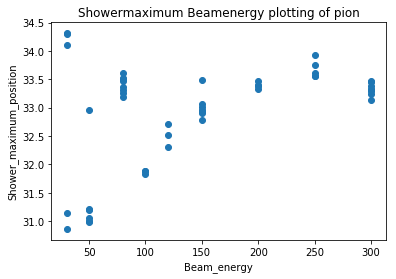

In [5]:
plt.scatter(energy, X0_meanvalue)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of pion")
plt.show()

 
0.5393 x + 31.82


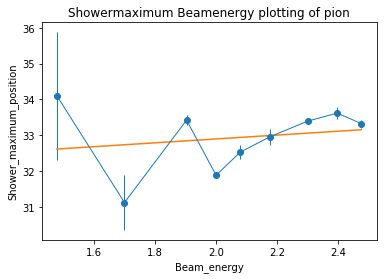

In [6]:
X0_meanvalue = df.groupby("energy").X0_meanvalue.median()
X0_meanvalue = X0_meanvalue.reset_index()
X0_variance = df.groupby("energy").X0_meanvalue.std()
X0_variance = X0_variance.reset_index()
beamenergy = df.groupby("energy").median()
beamenergy = beamenergy.reset_index()
Beamenergy = []
for energies in beamenergy.energy:
    energies = math.log(energies,10)
    Beamenergy.append(energies)
plt.errorbar(Beamenergy, beamenergy.X0_meanvalue, yerr=X0_variance.X0_meanvalue, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of pion")
z1=np.polyfit(Beamenergy, beamenergy.X0_meanvalue,1)
p1=np.poly1d(z1)
print(p1)
yvals=p1(Beamenergy)
plot1=plt.plot(Beamenergy, yvals)
#plt.xlim(0,2.5)
#plt.ylim(0,12)
plt.show()